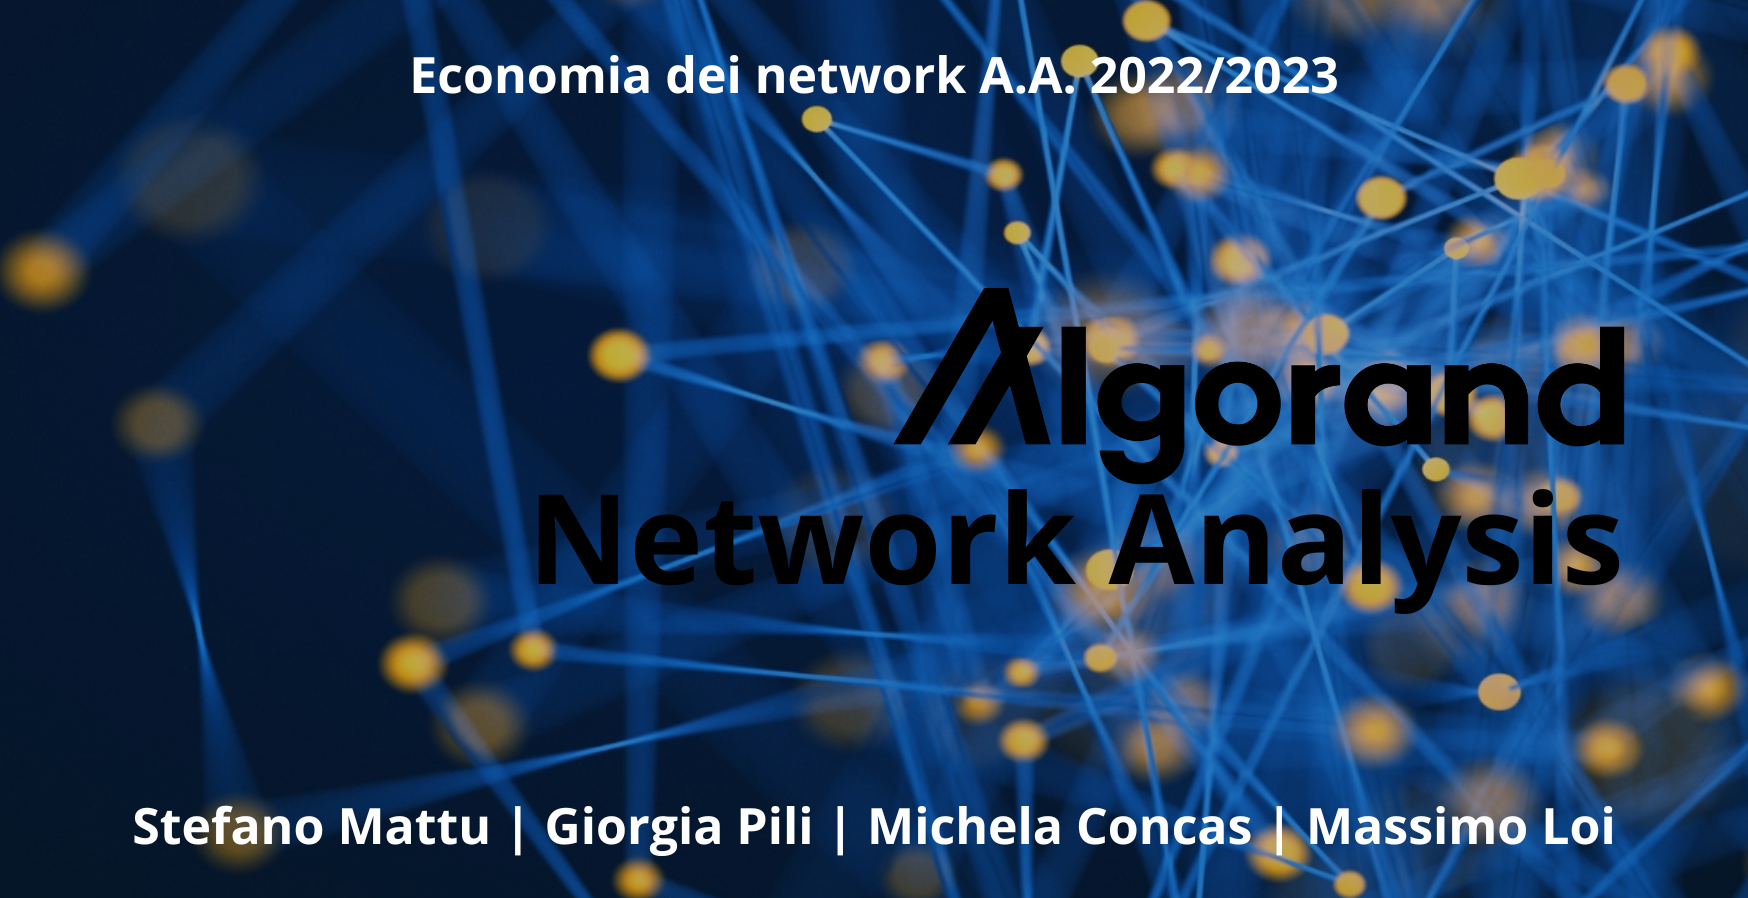

Esempio estratto dal file json originale dal quale sono stati creati i file csv:

In [ ]:
#  "messages": [
#     {
#       "id": "780842448422305792",
#       "type": "Default",
#       "timestamp": "2020-11-24T17:09:07.055+00:00",
#       "timestampEdited": null,
#       "callEndedTimestamp": null,
#       "isPinned": false,
#       "content": "I'm very happy that this is happening. Way to go Algorand.",
#       "author": {
#         "id": "581139241317302274",
#         "name": "munair",
#         "discriminator": "7513",
#         "nickname": "munair",
#         "color": null,
#         "isBot": false,
#         "avatarUrl": "https://cdn.discordapp.com/avatars/581139241317302274/a2695152e1aa58efc1f3a1e081d8fc7f.png?size=512"
#       },
#       "attachments": [],
#       "embeds": [],
#       "stickers": [],
#       "reactions": [
#         {
#           "emoji": {
#             "id": "",
#             "name": "\uD83E\uDD73",
#             "code": "partying_face",
#             "isAnimated": false,
#             "imageUrl": "https://cdn.jsdelivr.net/gh/twitter/twemoji@latest/assets/svg/1f973.svg"
#           },
#           "count": 1
#         }
#       ],
#       "mentions": []
#     }

Estrazione dei contenuti dal file json e creazione dei file csv

In [ ]:
import json
import pandas as pd
from datetime import datetime
with open('Algorand - Algorand - 🏛│governance [780538107879358494].json', encoding='utf-8') as f:
    data = json.load(f)

guild = data["guild"]
channel = data["channel"]
messages = data["messages"]
#print(messages)

#Clean keys dei messaggi
for message in messages:
    # del message["timestamp"]
    del message["timestampEdited"]
    del message["callEndedTimestamp"]
    if len(message["attachments"]) == 0:
        del message["attachments"]
    if len(message["embeds"]) == 0:
        del message["embeds"]
    del message["stickers"]
    if len(message["reactions"]) == 0:
        del message["reactions"]
    if len(message["mentions"]) == 0:
        del message["mentions"]

#CLEAN chiavi degli autori
for message in messages:
    del message["author"]["color"]
    del message["author"]["avatarUrl"]

#CREAZIONE DEL Dataframe MESSAGGI CON  PANDAS
messages_to_df = []
for message in messages:
    message_id = message["id"]
    type = message["type"]
    timestamp = str(message["timestamp"])[:10]
    timestamp = datetime.strptime(timestamp, '%Y-%m-%d').date()
    isPinned = message["isPinned"]
    content = message["content"]
    author_id = message["author"]["id"]
    author_nickname = message["author"]["nickname"]
    messages_to_df.append([message_id, type, timestamp, isPinned, content, author_id, author_nickname])


print(messages_to_df)
messages_df = pd.DataFrame(messages_to_df, columns=["Message_id", "Type", "Time_stamp", "isPinned", "Content", "Author_id", "Author_nickname"])
# print(messages_df)
messages_df.to_csv("Messages.csv", index=False, encoding='utf-8')

#CREAZIONE DEL Dataframe AUTORI CON PANDAS
authors_to_df = []
for message in messages:
    author_id = message["author"]["id"]
    nickname = message["author"]["nickname"]
    isBot = message["author"]["isBot"]
    authors_to_df.append([author_id, nickname, isBot])

authors_df = pd.DataFrame(authors_to_df, columns=["Author_id", "Author_Nickname", "isBot"])
print(authors_df)
authors_df.to_csv("Authors.csv", index=False, encoding='utf-8')


#CREAZIONE DEL  Dataframe MENZIONI CON PANDAS
#
mentions_to_df= []
for message in messages:
    if 'mentions' in message:
        message_id = message["id"]
        timestamp = str(message["timestamp"])[:10]
        timestamp = datetime.strptime(timestamp, '%Y-%m-%d').date()
        author_id = message["author"]["id"]
        author_nick = message["author"]["nickname"]
        mention_id=message['mentions'][0]['id']
        mention_nickname = message["mentions"][0]["nickname"]
        mention_isBot = message["mentions"][0]["isBot"]
        mentions_to_df.append([message_id, timestamp, author_id,author_nick, mention_id,mention_nickname,mention_isBot])

mentions= pd.DataFrame(mentions_to_df, columns=["Message_id","Time_stamp","Author_id","Author_nickname","Mention_id","Mention_nickname","Mention_isBot"])
mentions.to_csv("Mentions.csv", index=False, encoding='utf-8')
#
#
#IMPORTAZIONE DEI CSV
#
autori=pd.read_csv("Authors.csv")
messaggi=pd.read_csv("Messages.csv")
menzioni=pd.read_csv("Mentions.csv")


#VERIFICA DELLA PRESENZA DEI DUPLICATI

numero_duplicati_autori = autori.duplicated().sum()
print(f"Il numero di duplicati nel dataframe Autori è {numero_duplicati_autori} su {len(autori)}")

#per eliminare i duplicati
autori= autori.drop_duplicates()

numero_duplicati_messaggi=messaggi.duplicated().sum() #non ci sono duplicati
print(f"Il numero di duplicati nel dataframe Messaggi è {numero_duplicati_messaggi} su {len(messaggi)}")


numero_duplicati_menzioni = mentions.duplicated().sum() # CI SONO DUPLICATI
print(f"Il numero di duplicati nel dataframe menzioni è {numero_duplicati_menzioni} su {len(mentions)}")

#ELIMINIAMO I DUPLICATI
menzioni= menzioni.drop_duplicates()


#CONTROLLO PRESENZA DI NA

for column in autori.columns:
     print(column,autori[f'{column}'].isna().sum())  #non ci sono NA

for column in messaggi.columns:
     print(column,messaggi[f'{column}'].isna().sum())
#nella colonna content ci sono 148 Na
messaggi= messaggi.dropna()


for column in mentions.columns:
    print(column, mentions[f'{column}'].isna().sum()) #non ci sono Na

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                Author_id      Author_Nickname  isBot
0      581139241317302274               munair  False
1      614190026208837652  patrick.algo | nerd  False
2      591630331048886305               jamieg  False
3      487354161911037963              omartin  False
4      762698912939114558                C4EYO  False
...                   ...                  ...    ...
13939  951567578688524288         ReverseBones  False
13940  951567578688524288         ReverseBones  False
13941  186627398668779520              Trallux  False
13942  970109335164309545           averagezen  False
13943  186627398668779520              Trallux  False

[13944 rows x 3 columns]
Il numero di duplicati nel dataframe Autori è 12812 su 13944
Il numero di duplicati nel dataframe Messaggi è 0 su 13944
Il numero di duplicati nel dataframe menzioni è 0 su 4605
Author_id 0
Author_Nickname 0
isBot 0
Message_id 0
Type 0
Time_stamp 0
isPinned 0
Content 148
Author_id 0
Author_nickname 0
Message_id 0
Time_stamp 

Abbiamo creato 3 file chiamati "*Messages.csv*", "*Authors.csv*" and "*Mentions.csv*"



In [ ]:
messaggi.head(10)

Message_id     Type  Time_stamp  isPinned  \
0  780842448422305792  Default  2020-11-24     False   
1  780843754629234699  Default  2020-11-24     False   
2  780847993448169512  Default  2020-11-24     False   
3  780862867040763919  Default  2020-11-24     False   
4  780864028867821618  Default  2020-11-24     False   
5  780864190017306655  Default  2020-11-24     False   
6  780869576157560842  Default  2020-11-24     False   
7  780894184876933120  Default  2020-11-24     False   
8  780897029056233523  Default  2020-11-24     False   
9  780970029511606272  Default  2020-11-25     False   

                                             Content           Author_id  \
0  I'm very happy that this is happening. Way to ...  581139241317302274   
1                                                  🙌  614190026208837652   
2  very excited to see this go live.  will help b...  591630331048886305   
3                          Hi!! Algorand maniacs!! 😆  487354161911037963   
4                        I really like this proposal  762698912939114558   
5  I would like to suggest few things;\n\n1. Ther...  762698912939114558   
6  the rate would be fixed for the period...  the...  614190026208837652   
7                  Thanks for these replies everyone  566304202473865232   
8                                     Great proposal  132999600813506560   
9  I'll certainly like more actual implementation...  614190026208837652   

       Author_nickname  
0               munair  
1  patrick.algo | nerd  
2               jamieg  
3              omartin  
4                C4EYO  
5                C4EYO  
6  patrick.algo | nerd  
7               JasonW  
8                Broke  
9  patrick.algo | nerd

In [ ]:
autori.head(10)

Author_id      Author_Nickname  isBot
0   581139241317302274               munair  False
1   614190026208837652  patrick.algo | nerd  False
2   591630331048886305               jamieg  False
3   487354161911037963              omartin  False
4   762698912939114558                C4EYO  False
7   566304202473865232               JasonW  False
8   132999600813506560                Broke  False
10  697477736993652837                  fsx  False
11  160179318591455232             Jimbread  False
12  239128334166917121                kwame  False

In [ ]:
menzioni.head(10)

Message_id  Time_stamp           Author_id      Author_nickname  \
0  782262440691105803  2020-11-28  747821301447524413        kelicallaghan   
1  782286827414880257  2020-11-28  239128334166917121                kwame   
2  783743756984647730  2020-12-02  747821301447524413        kelicallaghan   
3  783751987576963094  2020-12-02  239128334166917121                kwame   
4  787562121381675008  2020-12-13  408883364523933696             Maksimus   
5  787785695153881089  2020-12-13  781714223368503308        Bobby Digital   
6  787785916063416320  2020-12-13  781714223368503308        Bobby Digital   
7  787838664049950741  2020-12-14  614190026208837652  patrick.algo | nerd   
8  787848433889312768  2020-12-14  535486939864760321             AlgoPaul   
9  787861694474354688  2020-12-14  782504606013587496               Richop   

           Mention_id     Mention_nickname  Mention_isBot  
0  239128334166917121                kwame          False  
1  747821301447524413        kelicallaghan          False  
2  239128334166917121                kwame          False  
3  747821301447524413        kelicallaghan          False  
4  557687938130116609         drumenbassik          False  
5  614190026208837652  patrick.algo | nerd          False  
6  614190026208837652  patrick.algo | nerd          False  
7  535486939864760321             AlgoPaul          False  
8  614190026208837652  patrick.algo | nerd          False  
9  535486939864760321             AlgoPaul          False

**Analisi esplorativa preliminare**



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Calcola il numero totale di messaggi
total_messages = len(messaggi)
print(f"Il numero di messaggi totali è pari a :{total_messages}\n")

# Conta il numero di messaggi fissati
pinned_messages = messaggi[messaggi['isPinned'] == True]
pinned_authors_nicknames = set(pinned_messages['Author_nickname'])
print(f"Il numero di messaggi che sono stati fisssati in alto è pari a: {len(pinned_messages)}\n"
      f"Gli autori dei messaggi sono: {pinned_authors_nicknames}\n")

# Calcola il numero totale di autori
total_authors = len(autori)
n_bot = autori['isBot'].value_counts()[True]
print(f"Il numero di autori totali è pari a :{total_authors} di cui {n_bot} sono bot\n")

# Calcola le % di messaggi generati da autori verificati (isBot=False) e da bot (isBot=True)
verified_messages = messaggi[messaggi['Author_id'].isin(autori[autori['isBot'] == False]['Author_id'])]['Message_id'].count()
bot_messages = messaggi[messaggi['Author_id'].isin(autori[autori['isBot'] == True]['Author_id'])]['Message_id'].count()
verified_percentage = (verified_messages / total_messages) * 100
bot_percentage = (bot_messages / total_messages) * 100
print(f"I messaggi scritti da autori verificati sono il {verified_percentage.round(3)}% del totale,"
      f"quelli scritti da bot il {bot_percentage.round(3)}%\n")

Il numero di messaggi totali è pari a :13796

Il numero di messaggi che sono stati fisssati in alto è pari a: 4
Gli autori dei messaggi sono: {'Shai Halevi', 'Fabrice | Algorand Foundation', 'Adri'}

Il numero di autori totali è pari a :1132 di cui 1 sono bot

I messaggi scritti da autori verificati sono il 99.971% del totale,quelli scritti da bot il 0.029%



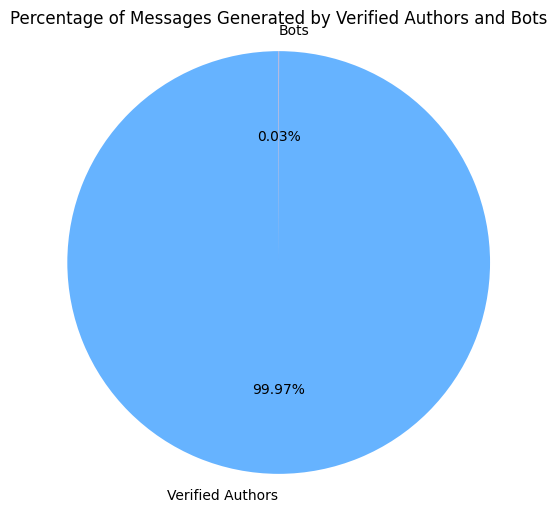

In [ ]:
# Creiamo un grafico a torta con Seaborn
data = {'Category': ['Verified Authors', 'Bots'],
        'Percentage': [verified_percentage, bot_percentage]}
df = pd.DataFrame(data)
colors = ['#66b3ff', '#ff9999']
sns.set_palette(colors)
plt.figure(figsize=(6, 6))
plt.pie(df['Percentage'], labels=df['Category'], colors=colors, autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Messages Generated by Verified Authors and Bots')
plt.show()

In [ ]:
# Elimina i messaggi generati da autori bot
messaggi = messaggi[~messaggi['Author_id'].isin(autori[autori['isBot'] == True]['Author_id'])]
total_messages = len(messaggi)
print(f"Il numero di messaggi totali è pari a :{total_messages}")

Il numero di messaggi totali è pari a :13792


In [ ]:
# Numero di autori menzionati da altri autori almeno una volta
mentioned_nicknames = menzioni['Mention_nickname'].unique()
mentioned_authors = autori[autori['Author_Nickname'].isin(mentioned_nicknames)]
men_perc = (len(mentioned_authors) / total_authors) * 100
print(f"Il numero di autori menzionati almeno una volta è pari a {len(mentioned_authors)}, il {men_perc.__round__(3)}% del totale")

Il numero di autori menzionati almeno una volta è pari a 781, il 68.993% del totale


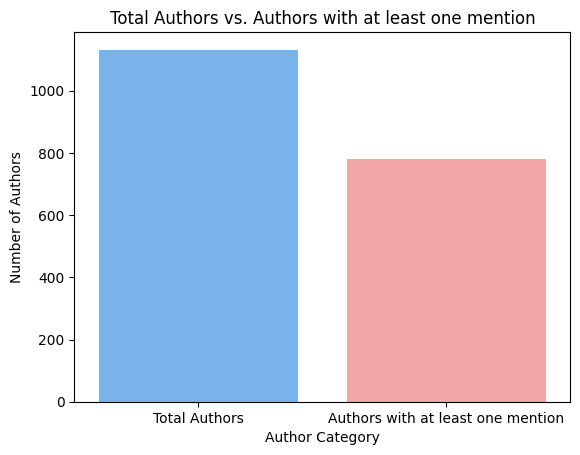

In [ ]:
#Creiamo un barplot con Seaborn
data = {'Category': ['Total Authors', 'Authors with at least one mention'],
        'Number of Authors': [total_authors, len(mentioned_authors)]}
df = pd.DataFrame(data)
sns.barplot(x='Category', y='Number of Authors', data=df)
plt.xlabel('Author Category')
plt.ylabel('Number of Authors')
plt.title('Total Authors vs. Authors with at least one mention')
plt.show()

**Analisi del network**

***Primo quesito***: *Individuare i cluster di utenti attivi nella chat sia dal punto di vista generale ma anche in una prospettiva temporale*

In [ ]:
import networkx as nx

In [ ]:
"""
> id_autore è l'autore del messaggio
> id_mention è l'id di chi viene menzionato nel messggio"""

cluster = {}
for autore in menzioni['Author_nickname']:
    if autore not in cluster.keys():
        cluster[autore]=[]

for _, row in menzioni.iterrows():
    if row['Author_nickname'] in cluster.keys():
        cluster[row['Author_nickname']].append(row['Mention_nickname'])


dizionario={}
for chiave in cluster.keys():
    dizionario[chiave]={}
    for valore in cluster[chiave]:
        dizionario[chiave][valore]=cluster[chiave].count(valore)

print(f'Il dizionario così creato si presenta in questo modo:\n{dizionario}')

Il dizionario così creato si presenta in questo modo:
{'kelicallaghan': {'kwame': 4, 'SteveAlgorandFdn': 1, 'ayberk': 1, 'botrebelgold': 1, 'lucamagnolia': 1, 'nic': 1, 'Algorander': 1, 'Deleted User': 1, 'michel': 1}, 'kwame': {'kelicallaghan': 6, 'stevekokinos': 3, 'AlgoSeanLee': 1, 'Chris Swenor': 1, 'Shamir': 2, 'Deleted User': 1, 'SteveAlgorandFdn': 1, 'patrick.algo | nerd': 3, 'addie': 4, 'JasonW': 1, 'AltoParadise': 1, 'SaltyPepperFox': 2}, 'Maksimus': {'drumenbassik': 1}, 'Bobby Digital': {'patrick.algo | nerd': 2}, 'patrick.algo | nerd': {'AlgoPaul': 1, 'Chris Swenor': 1, 'AndrewGardner': 1, 'AJK': 2, 'SteveAlgorandFdn': 1, 'Algorander': 6, 'Deleted User': 8, 'lets go algo': 1, 'kwame': 1, 'Drel': 2, 'yanik': 1, 'wes.algo': 1, 'Revolution': 1, 'BTTJ': 1, 'ProstheticHead': 3, 'Denzo': 3, 'gibbenup': 1, 'Popo': 4, 'AltoParadise': 3, 'a3voices': 1, 'GONZALO': 1, 'Gloat': 1, 'sayhisam1': 1, 'VIKTORVAV99': 1, 'LudovitScholtz': 4, 'Sahil': 1, 'rafianz': 1, 'AltMom 👑✨🏆': 1, 'HȺshMȺps

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129332 (\N{PRINCE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128065

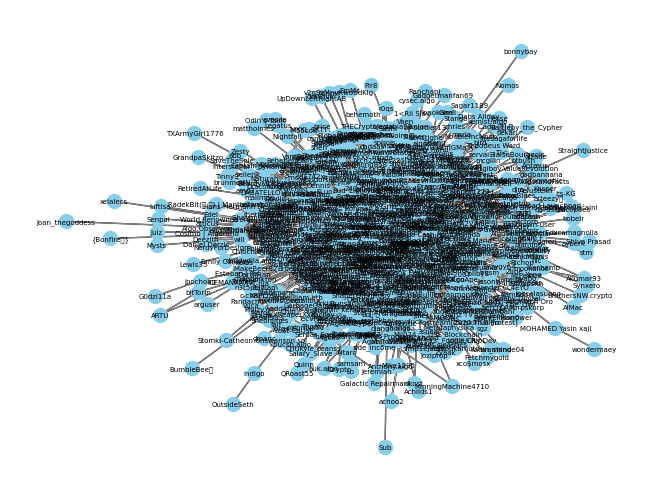

In [ ]:
"""CREAZIONE DEL GRAFO GENERICO DOVE MOSTRIAMO IL GRAFO"""
G = nx.Graph()

# Aggiungere nodi al grafo
for node in dizionario.keys():
    G.add_node(node)

# Aggiungere archi al grafo con attributo "weight" uguale al numero di menzioni
for node, mentions in dizionario.items():
    for neighbor, weight in mentions.items():
        G.add_edge(node, neighbor, weight=weight)

# VISUALIZZAZIONE DEL GRAFO
pos = nx.kamada_kawai_layout(G)
labels = {node: node for node in G.nodes()}

# Disegnamo i nodi, gli archi e le etichette
nx.draw(G, pos, with_labels=False, node_size=100, node_color='skyblue')
nx.draw_networkx_labels(G, pos, labels, font_size=5, font_color='black')
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.9, edge_color='lightgray')


plt.axis('off')
plt.show()

Nodo kelicallaghan: Grado 13
Nodo kwame: Grado 16
Nodo Maksimus: Grado 1
Nodo Bobby Digital: Grado 2
Nodo patrick.algo | nerd: Grado 100
Nodo AlgoPaul: Grado 12
Nodo Richop: Grado 4
Nodo Kevin F: Grado 2
Nodo stm: Grado 1
Nodo SteveAlgorandFdn: Grado 30
Nodo marcblinder: Grado 14
Nodo C4EYO: Grado 1
Nodo Chris Swenor: Grado 10
Nodo AlgoSeanLee: Grado 8
Nodo MOHAMED Yasin xaji: Grado 2
Nodo wondermaey: Grado 1
Nodo Deleted User: Grado 72
Nodo Nuno: Grado 10
Nodo botrebelgold: Grado 10
Nodo Danial: Grado 1
Nodo godbannana: Grado 2
Nodo addie: Grado 23
Nodo Its-KG: Grado 2
Nodo michel: Grado 8
Nodo MassimoAlgorandFoundation: Grado 7
Nodo cryptocommunity: Grado 10
Nodo Shiva Prasad: Grado 1
Nodo MrPearce: Grado 1
Nodo Jason Lee: Grado 7
Nodo John B.: Grado 5
Nodo John | Cambridge Cryptographic: Grado 4
Nodo AJK: Grado 8
Nodo Akumar93: Grado 2
Nodo nic: Grado 3
Nodo purestaketdb: Grado 4
Nodo moonshot: Grado 2
Nodo Algorander: Grado 11
Nodo stevekokinos: Grado 1
Nodo Jimbread: Grado 11
Nodo

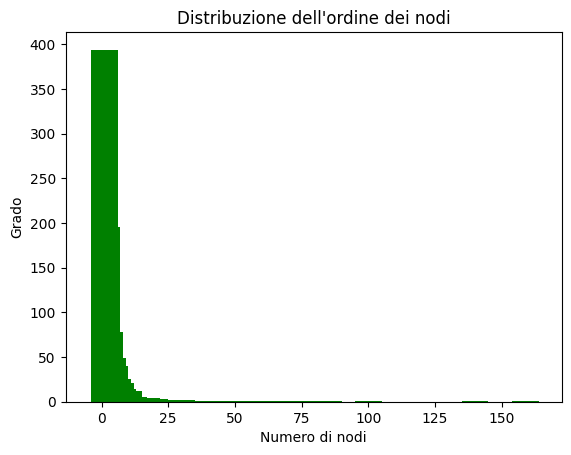

In [ ]:
"""STAMPA LA DISTRIBUZIONE DEL GRADO DEI NODI"""
degrees = G.degree()

for node, degree in degrees:
    print(f"Nodo {node}: Grado {degree}")
import matplotlib.pyplot as plt

degree_freq = nx.degree_histogram(G)

degrees = range(len(degree_freq))
freq = degree_freq

plt.bar(degrees, freq, width=10, color='green')
plt.xlabel('Numero di nodi')
plt.ylabel('Grado')
plt.title('Distribuzione dell\'ordine dei nodi')
plt.show()

In [ ]:
# STAMPO SOGGETTI PIU MENZIONATI
mentions_count = {node: sum(mentions.values()) for node, mentions in dizionario.items()}
sorted_mentions = sorted(mentions_count.items(), key=lambda x: x[1], reverse=True)
top_authors = dict(sorted_mentions[:8])

for chiave, valore in top_authors.items():
    print(f'{chiave} viene menzionato {valore} volte')

nullun viene menzionato 239 volte
Mf3jgh7k viene menzionato 239 volte
Deleted User viene menzionato 194 volte
Jeremy.algo viene menzionato 176 volte
averagezen viene menzionato 169 volte
amalgam viene menzionato 126 volte
patrick.algo | nerd viene menzionato 108 volte
ipaleka viene menzionato 108 volte


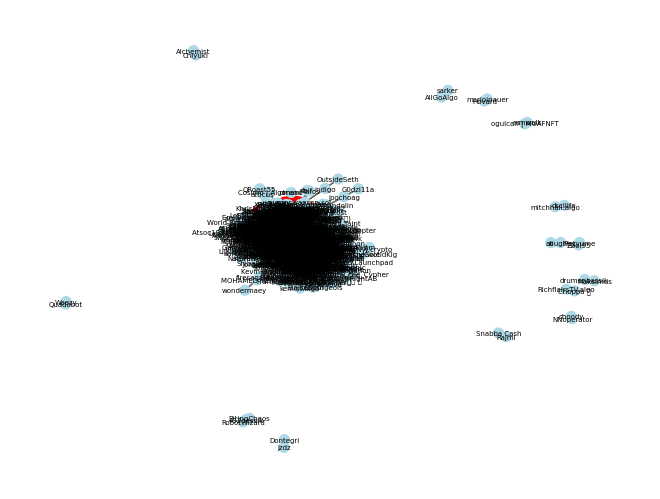

In [ ]:
"""GRAFO CON NODI DI COLORE E DIMENSIONE DIFFERENTE IN BASE AL PESO"""

G = nx.Graph()
for node in dizionario.keys():
        G.add_node(node)

for node, mentions in dizionario.items():
        for neighbor, weight in mentions.items():
            G.add_edge(node, neighbor, weight=weight)

pos = nx.spring_layout(G)
labels = {node: node for node in G.nodes()}


size_map = []
node_color = []

for node in G.nodes():
    if node in mentions_count:
        mentions = mentions_count[node]
        if mentions > 100:
            size_map.append(2000)
            node_color.append('red')
        elif mentions > 50:
            size_map.append(1000)
            node_color.append('green')
        elif mentions > 20:
            size_map.append(500)
            node_color.append('yellow')
        elif mentions > 5:
            size_map.append(200)
            node_color.append('purple')
        else:
            size_map.append(50)
            node_color.append('lightblue')
    else:
        size_map.append(50)
        node_color.append('lightblue')


# Draw the graph with modified parameters
nx.draw(G, pos, with_labels=False, node_size=size_map, node_color=node_color)
nx.draw_networkx_labels(G, pos, font_size=5, font_color='black')
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.8, edge_color='lightgray')

plt.rcParams['font.family'] = 'DejaVu Sans'

plt.axis('off')
plt.show()

Algoritmo Girvan-Newman

In [ ]:
from networkx.algorithms.community import girvan_newman

In [ ]:
cluster = {}

for autore in menzioni['Author_nickname']:
    if autore not in cluster.keys():
        cluster[autore] = []

for _, row in menzioni.iterrows():
    if row['Author_nickname'] in cluster.keys():
        cluster[row['Author_nickname']].append(row['Mention_nickname'])

dizionario = {}

for chiave in cluster.keys():
    dizionario[chiave] = {}
    for valore in cluster[chiave]:
        dizionario[chiave][valore] = cluster[chiave].count(valore)

In [ ]:
# CREAZIONE GRAFO
G = nx.Graph()

# Aggiungiamo gli archi al grafo con attributo "weight" uguale al numero di menzioni
for node, mentions in cluster.items():
    for neighbor, weight in dict(pd.Series(mentions).value_counts()).items():
        G.add_edge(node, neighbor, weight=weight)

# CALCOLIAMO IL  GIRVAN NEWMAN ALGORITHM
def girvan_newman(G):
    if G.number_of_edges() == 0:
        return [G.nodes()]
    else:
        # Calcoliamo la betweenness centrality degli archi
        edge_betweenness = nx.edge_betweenness_centrality(G)

        # Troviamo l'arco con la betweenness centrality più alta
        max_betweenness = max(edge_betweenness.values())
        max_betweenness_edges = [edge for edge, betweenness in edge_betweenness.items() if betweenness == max_betweenness]

        # Rimuoviamo l'arco con la betweenness centrality più alta
        G_copy = G.copy()
        G_copy.remove_edges_from(max_betweenness_edges)

        # Calcoliamo le componenti connesse
        components = list(nx.connected_components(G_copy))

        # Ripetiamo i punti precedenti
        if len(components) == 1:
            return components
        else:
            result = []
            for component in components:
                subgraph = G_copy.subgraph(component)
                result.extend(girvan_newman(subgraph))
            return result

components = girvan_newman(G)
# print(components)

num_clusters = len(components)
print("Numero di cluster:", num_clusters)

Numero di cluster: 30


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128065 (\N{EYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128298 (\N{HOCHO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129332 (\N{PR

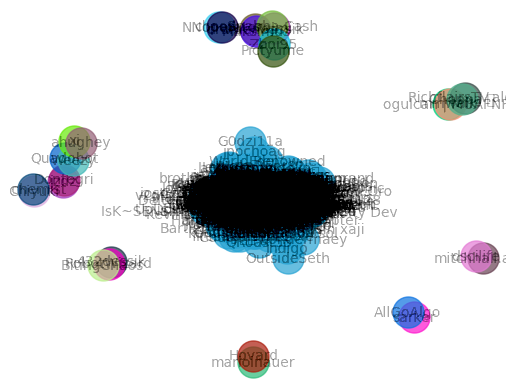

In [ ]:
#Visualizzazione delle componenti connesse
pos = nx.spring_layout(G)

colors = []

# Controlla se il numero di colori è inferiore al numero di cluster
if num_clusters > len(colors):
    # Genera colori casuali per i cluster rimanenti
    import random
    random.seed(32)
    while len(colors) < num_clusters:
        random_color = "#" + ("%06x" % random.randint(0, 0xFFFFFF))
        colors.append(random_color)

for i, component in enumerate(components):
    nx.draw_networkx_nodes(G, pos, nodelist=list(component),
                           node_color=colors[i % len(colors)],
                           node_size=500, alpha=0.7)

    nx.draw_networkx_edges(G, pos,
                           edgelist=list(G.subgraph(component).edges()),
                           width=1, alpha=0.5, edge_color='gray')

    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black',alpha=0.01)

plt.axis('off')
plt.show()

Algoritmo Greedy Modularity

In [ ]:
import networkx.algorithms.community as nxcom
plt.rcParams['font.family'] = 'DejaVu Sans'

In [ ]:
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 13
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

def set_node_community(G, communities):
    for c, v_c in enumerate(communities):
        for v in v_c:
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    for v, w in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            G.edges[v, w]['community'] = 0

In [ ]:
# Applichiamo l'algoritmo della GREEDY MODULARITY
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

print(f"La chat ha {len(communities)} comunità.")

La chat ha 31 comunità.


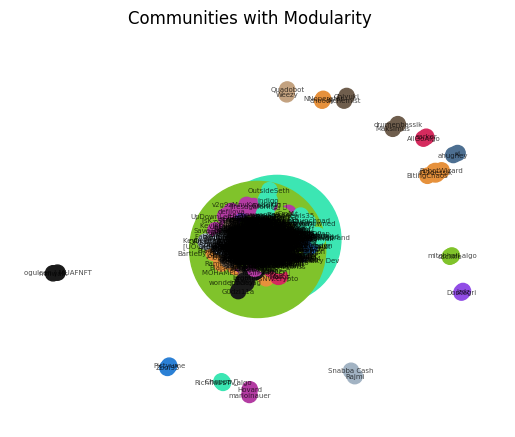

In [ ]:
size_map = [60 + 60 * G.degree[node] for node in G.nodes]

set_node_community(G, communities)
set_edge_community(G)

node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]

internal_color = ['lightgray'] * len(internal)

pos = nx.spring_layout(G)
plt.suptitle("Communities with Modularity")

nx.draw_networkx_labels(G, pos=pos, font_size=5, font_color='black', alpha=0.7)

nx.draw_networkx(
    G,
    pos=pos,
    node_size=0,
    edgelist=external,
    edge_color="lightgray",
    with_labels=False)

nx.draw_networkx(
    G,
    pos=pos,
    node_color=node_color,
    node_size=size_map,
    edgelist=internal,
    edge_color=internal_color,
    with_labels=False)

plt.axis('off')
plt.show()

<ipython-input-30-54354cfbcb16>:52: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from current font.
  plt.tight_layout()
<ipython-input-30-54354cfbcb16>:52: UserWarning: Glyph 128065 (\N{EYE}) missing from current font.
  plt.tight_layout()
<ipython-input-30-54354cfbcb16>:52: UserWarning: Glyph 127943 (\N{HORSE RACING}) missing from current font.
  plt.tight_layout()
<ipython-input-30-54354cfbcb16>:52: UserWarning: Glyph 129332 (\N{PRINCE}) missing from current font.
  plt.tight_layout()
<ipython-input-30-54354cfbcb16>:52: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from current font.
  plt.tight_layout()
<ipython-input-30-54354cfbcb16>:52: UserWarning: Glyph 129782 (\U0001faf6) missing from current font.
  plt.tight_layout()
<ipython-input-30-54354cfbcb16>:52: UserWarning: Glyph 129689 (\N{COIN}) missing from current font.
  plt.tight_layout()
<ipython-input-30-54354cfbcb16>:52: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from current font.
  plt.tight_layou

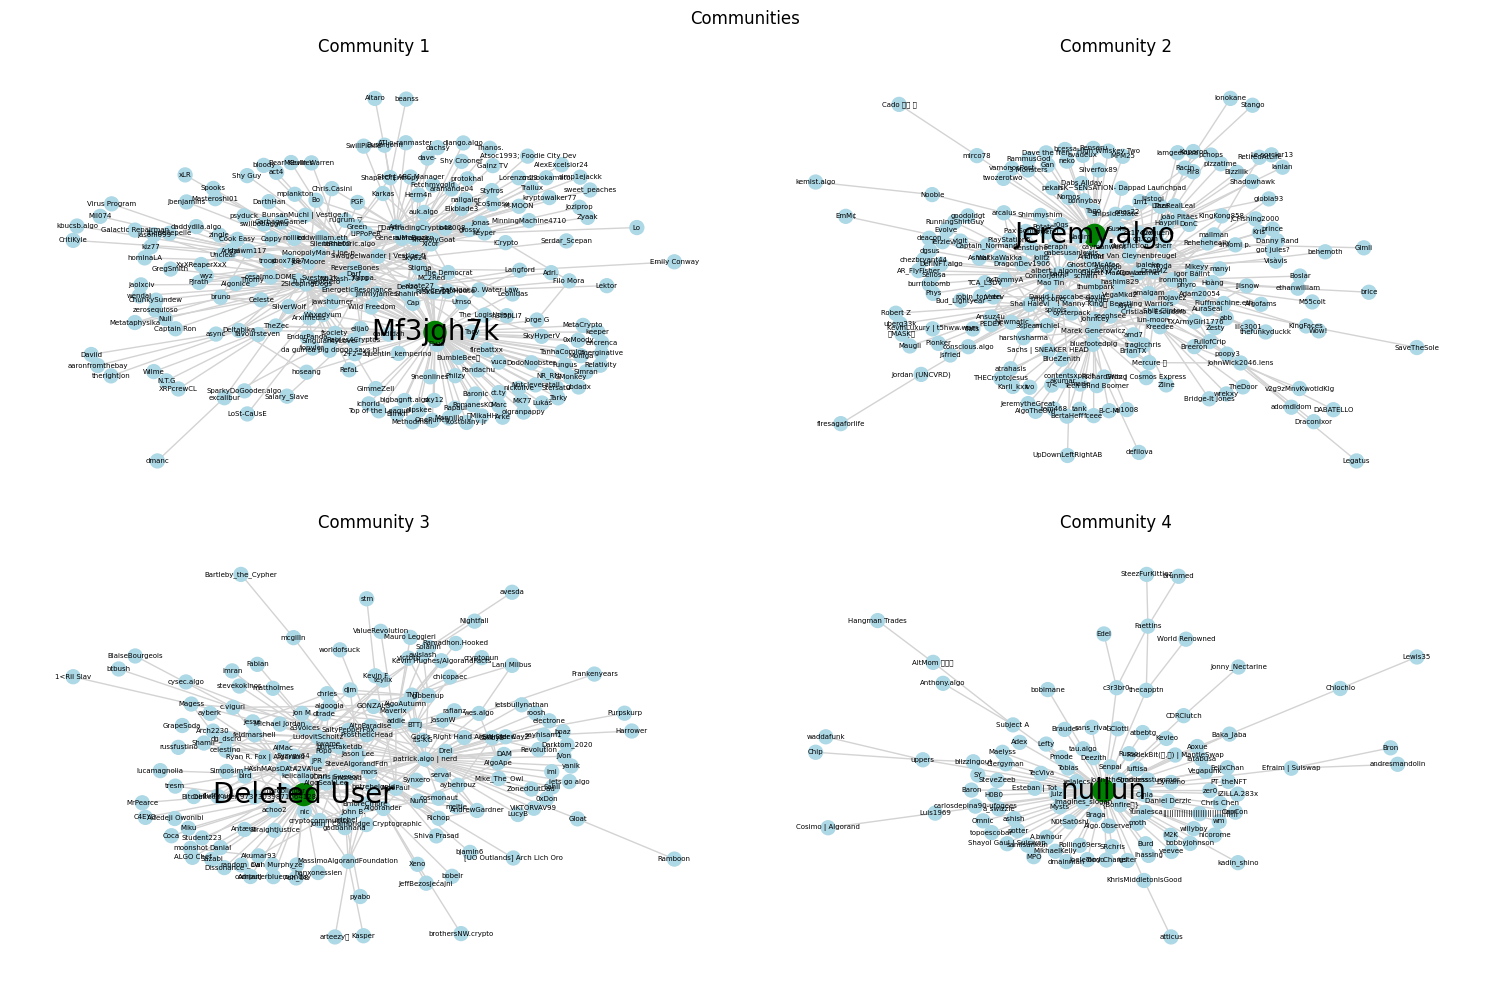

<ipython-input-30-54354cfbcb16>:52: UserWarning: Glyph 9402 (\N{CIRCLED LATIN CAPITAL LETTER E}) missing from current font.
  plt.tight_layout()
<ipython-input-30-54354cfbcb16>:52: UserWarning: Glyph 9414 (\N{CIRCLED LATIN CAPITAL LETTER Q}) missing from current font.
  plt.tight_layout()
<ipython-input-30-54354cfbcb16>:52: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  plt.tight_layout()
<ipython-input-30-54354cfbcb16>:52: UserWarning: Glyph 8383 (\N{BITCOIN SIGN}) missing from current font.
  plt.tight_layout()
<ipython-input-30-54354cfbcb16>:52: UserWarning: Glyph 128009 (\N{DRAGON}) missing from current font.
  plt.tight_layout()
<ipython-input-30-54354cfbcb16>:52: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  plt.tight_layout()
<ipython-input-30-54354cfbcb16>:52: UserWarning: Glyph 128998 (\N{LARGE BLUE SQUARE}) missing from current font.
  plt.tight_layout()


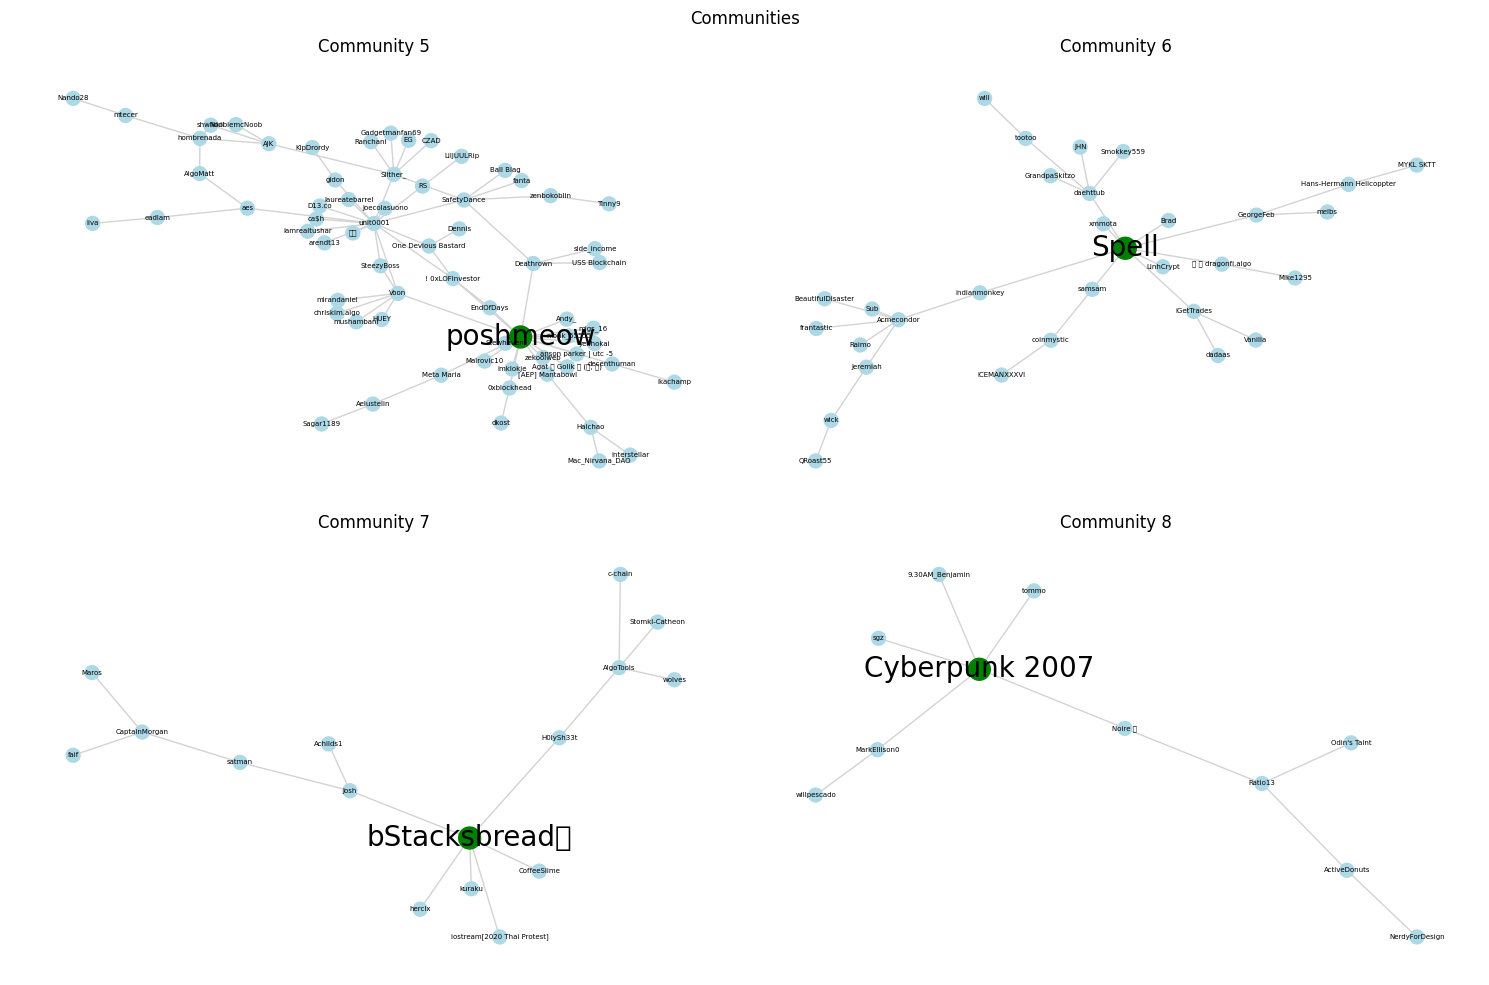

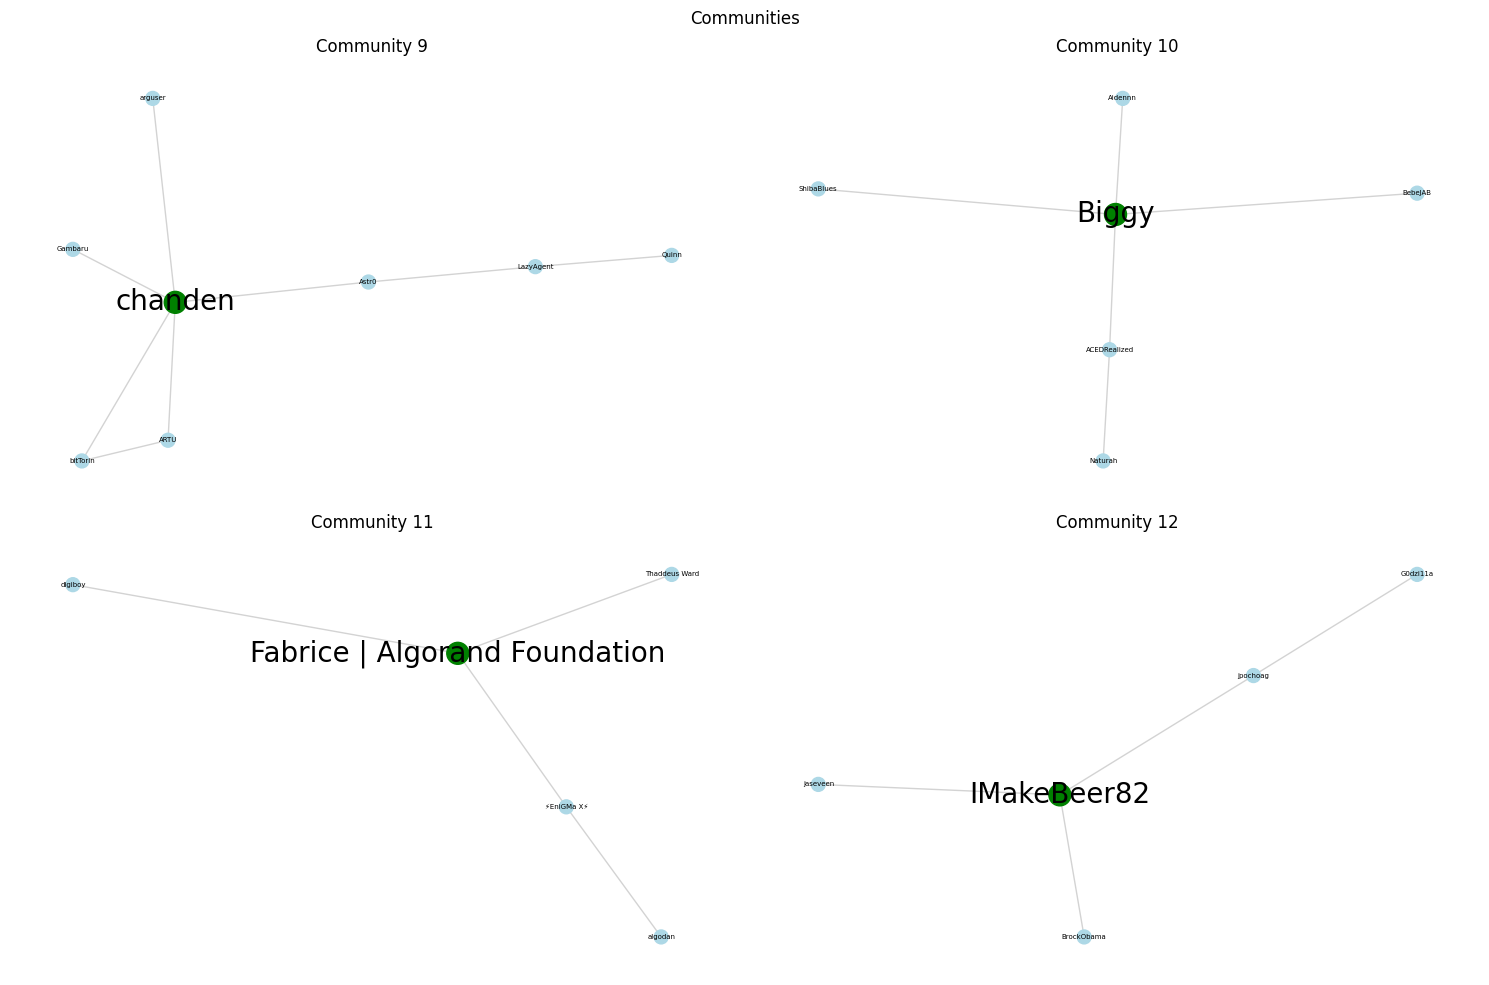

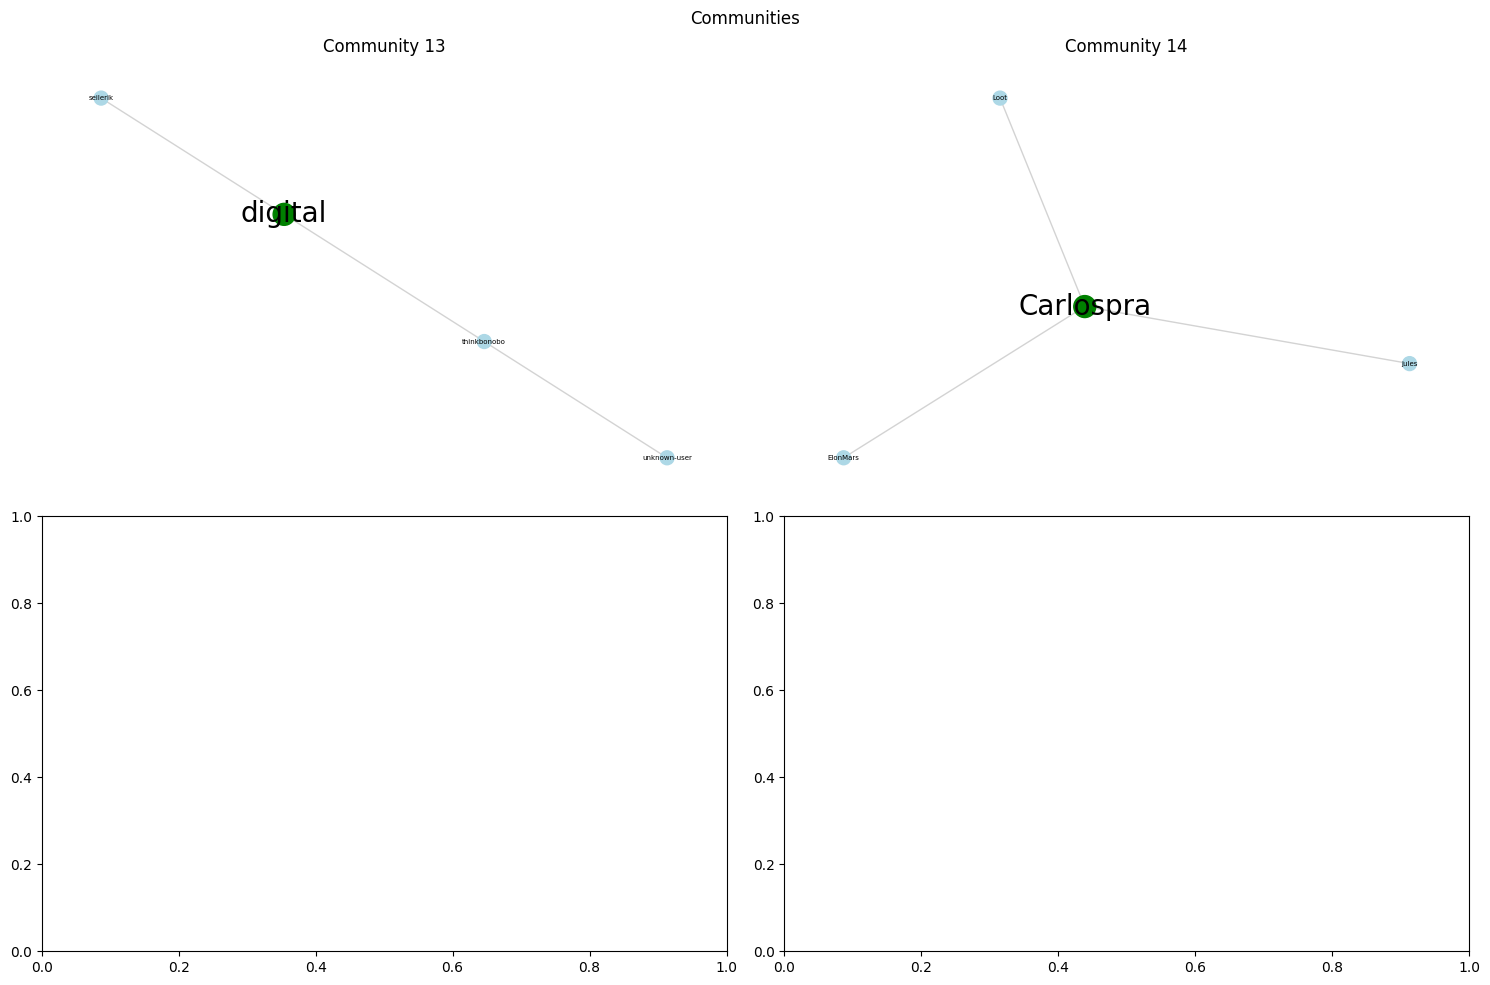

In [ ]:
"""Mostriamo le comunità più rilevanti"""


def plot_community_graphs(G, communities):
    num_communities = len(communities)

    communities_per_subplot = 4
    num_subplots = 4

    for subplot_num in range(num_subplots):
        start_idx = subplot_num * communities_per_subplot
        end_idx = min((subplot_num + 1) * communities_per_subplot, num_communities)

        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle("Communities")

        for i, community_idx in enumerate(range(start_idx, end_idx)):
            community = communities[community_idx]

            if len(community) > 3:
                community_graph = G.subgraph(community)

                pos = nx.spring_layout(community_graph)
                pagerank_scores = nx.pagerank(community_graph)
                most_important_node = max(pagerank_scores, key=pagerank_scores.get)

                node_colors = ['lightblue' if node != most_important_node else 'green' for node in community_graph.nodes]
                node_size = [100 if node != most_important_node else 250 for node in community_graph.nodes]

                edge_colors = ['lightgray' if G.edges[v, w]['community'] > 0 else 'lightblue' for v, w in community_graph.edges]

                labels = {}
                font_sizes = {}
                for node in community_graph.nodes:
                    if node == most_important_node:
                        labels[node] = node
                        font_sizes[node] = 20
                    else:
                        labels[node] = node
                        font_sizes[node] = 5

                ax = axes[i // 2, i % 2]
                ax.set_title(f"Community {community_idx + 1}")
                ax.axis('off')

                nx.draw_networkx(community_graph, pos, ax=ax, with_labels=False, node_color=node_colors,
                                 node_size=node_size, edge_color=edge_colors)

                for node, (x, y) in pos.items():
                    ax.text(x, y, labels[node], fontsize=font_sizes[node], ha='center', va='center')

        plt.tight_layout()
        plt.show()

plot_community_graphs(G, communities)

La chat ha 31 comunità.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128065 (\N{EYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128298 (\N{HOCHO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129332 (\N{PR

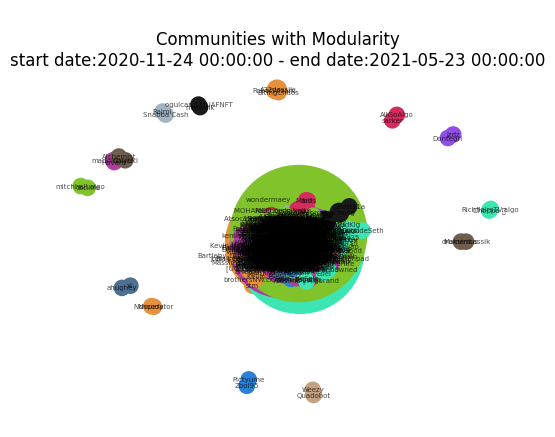

<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 128065 (\N{EYE}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 127943 (\N{HORSE RACING}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 129332 (\N{PRINCE}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 129782 (\U0001faf6) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 129689 (\N{COIN}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from current font.
  plt.tight_layou

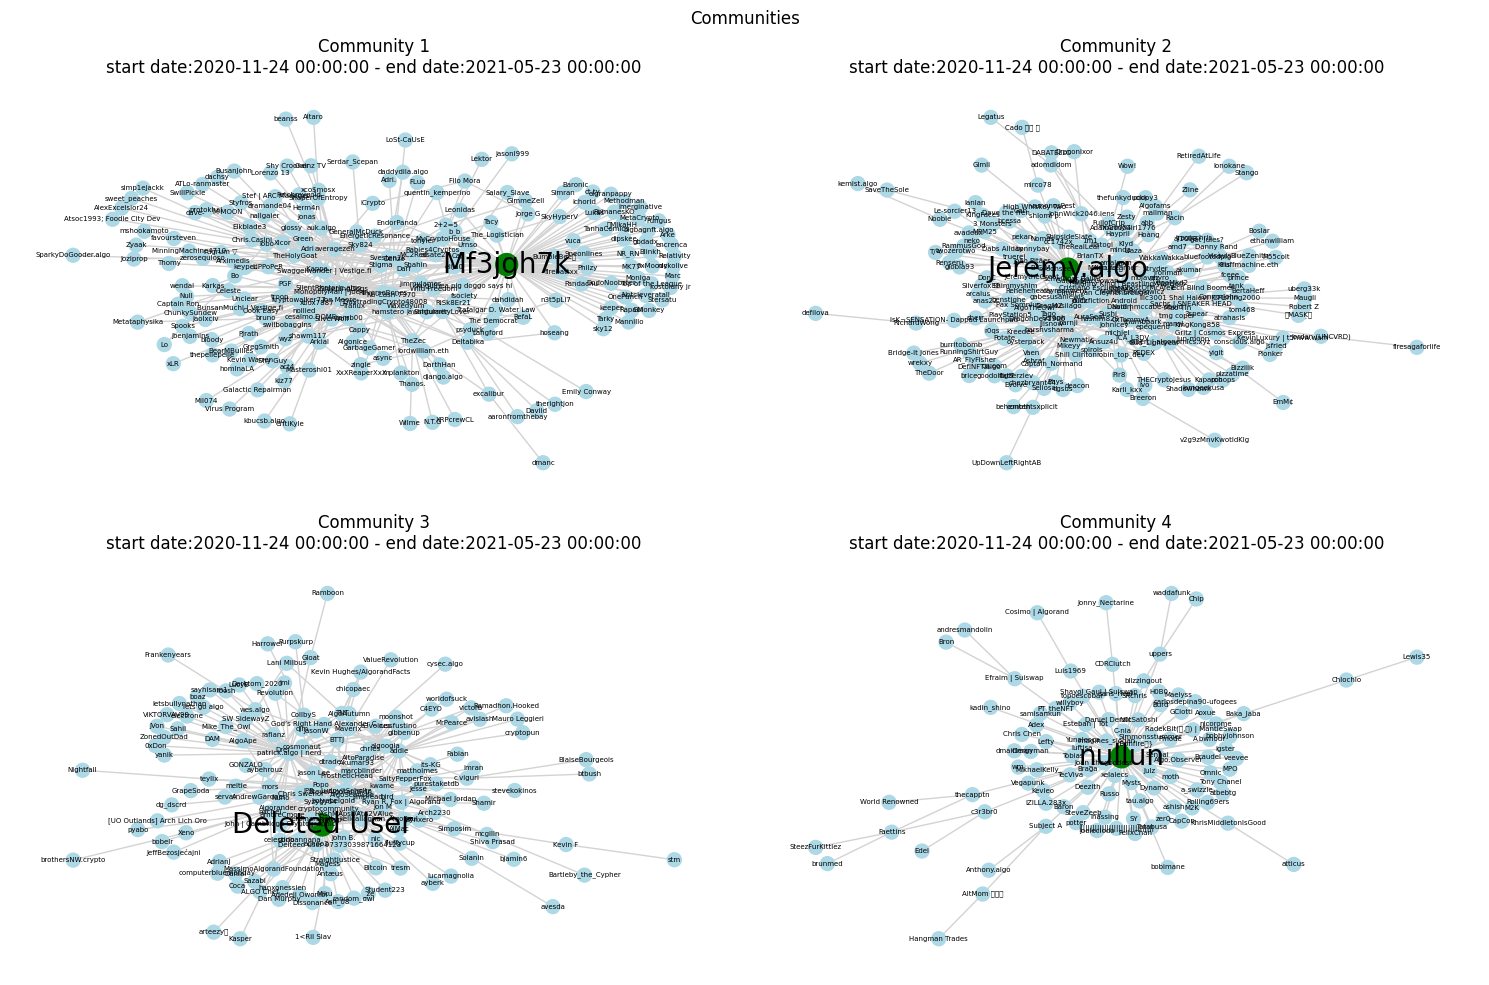


Numero totaledi nodi che cambiato comunità: 0

La chat ha 31 comunità.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128065 (\N{EYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128298 (\N{HOCHO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129332 (\N{PR

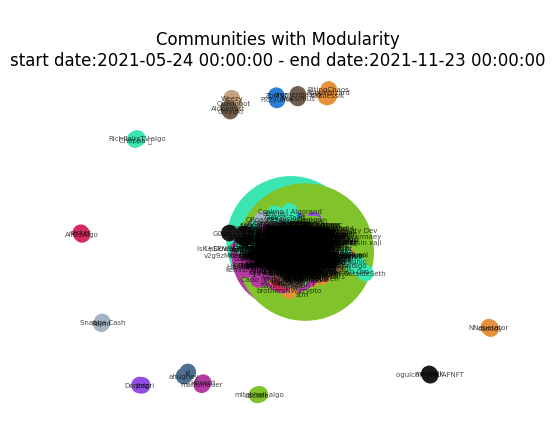

<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 128065 (\N{EYE}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 127943 (\N{HORSE RACING}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 129332 (\N{PRINCE}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 129782 (\U0001faf6) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 129689 (\N{COIN}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from current font.
  plt.tight_layou

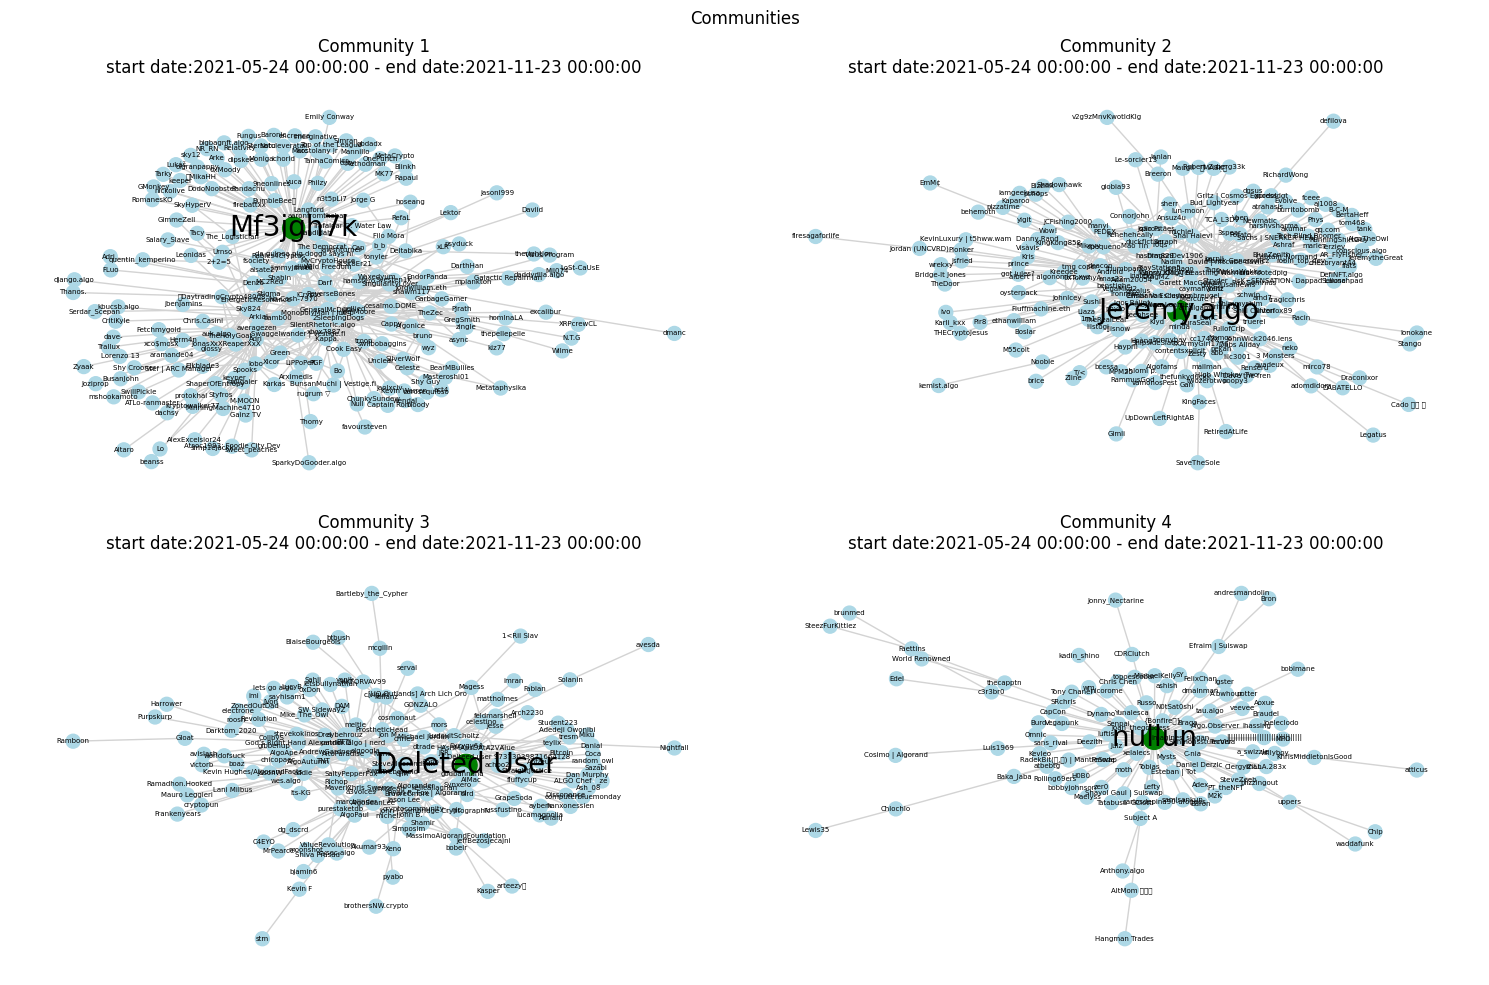


Numero totaledi nodi che cambiato comunità: 0

La chat ha 31 comunità.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128065 (\N{EYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128298 (\N{HOCHO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129332 (\N{PR

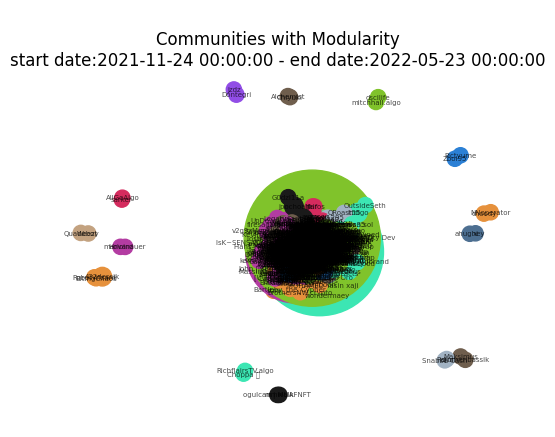

<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 128065 (\N{EYE}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 127943 (\N{HORSE RACING}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 129332 (\N{PRINCE}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 129782 (\U0001faf6) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 129689 (\N{COIN}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from current font.
  plt.tight_layou

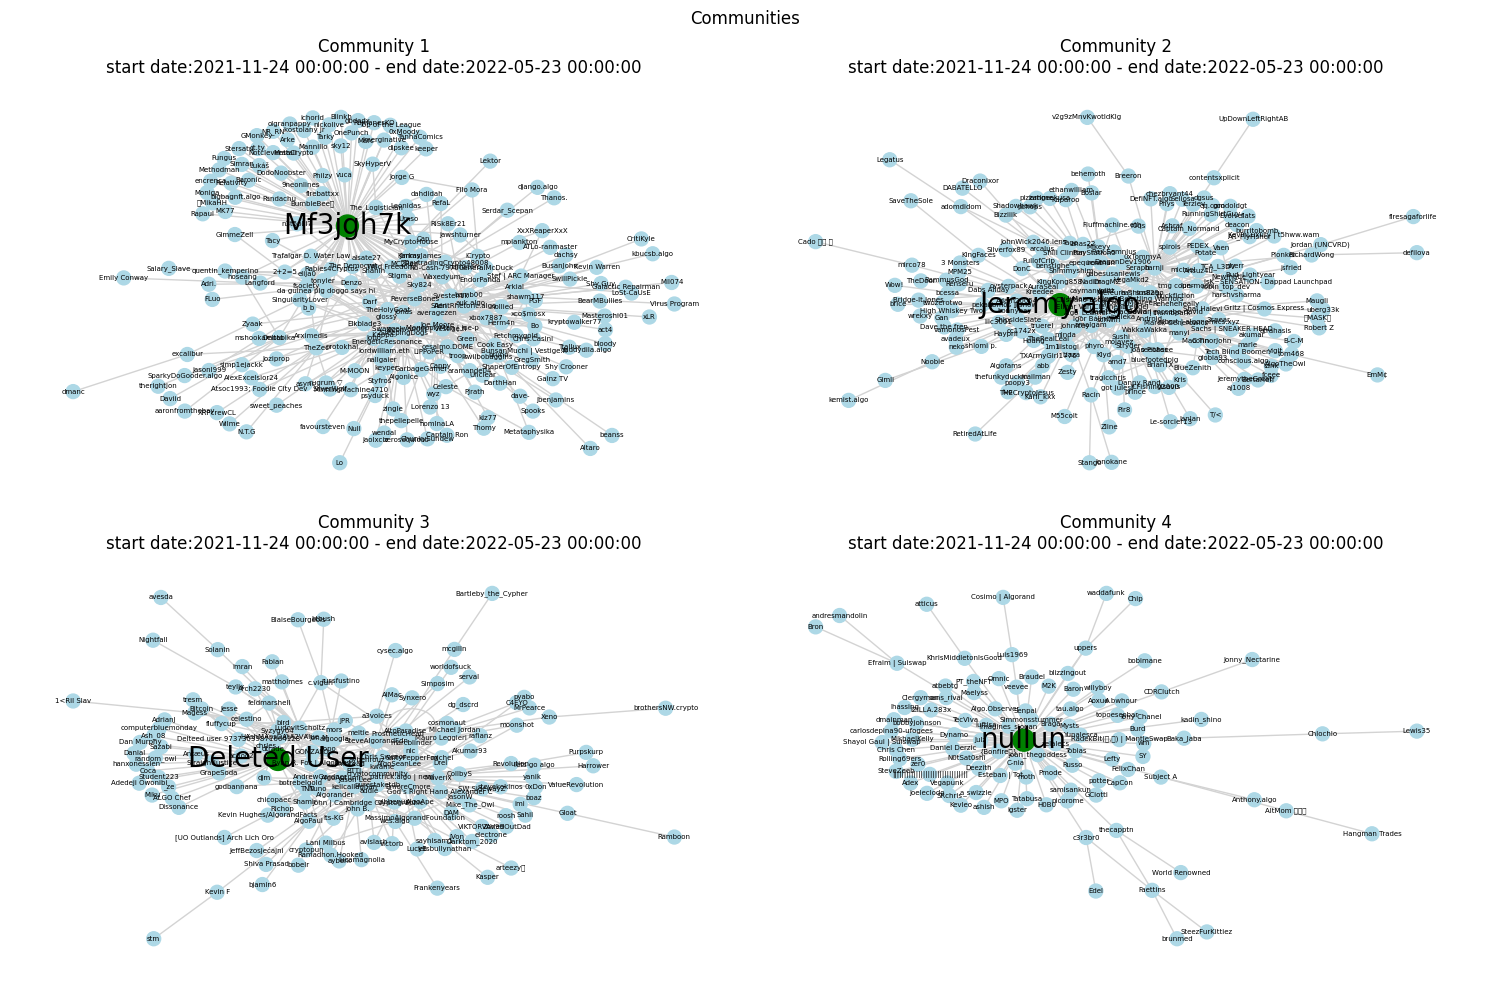


Numero totaledi nodi che cambiato comunità: 0

La chat ha 31 comunità.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128065 (\N{EYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128298 (\N{HOCHO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129332 (\N{PR

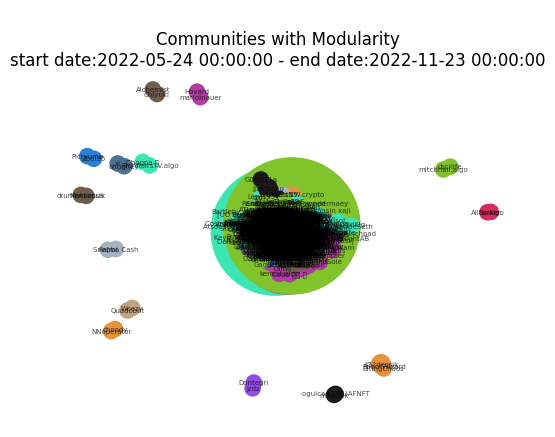

<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 128065 (\N{EYE}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 127943 (\N{HORSE RACING}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 129332 (\N{PRINCE}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 129782 (\U0001faf6) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 129689 (\N{COIN}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from current font.
  plt.tight_layou

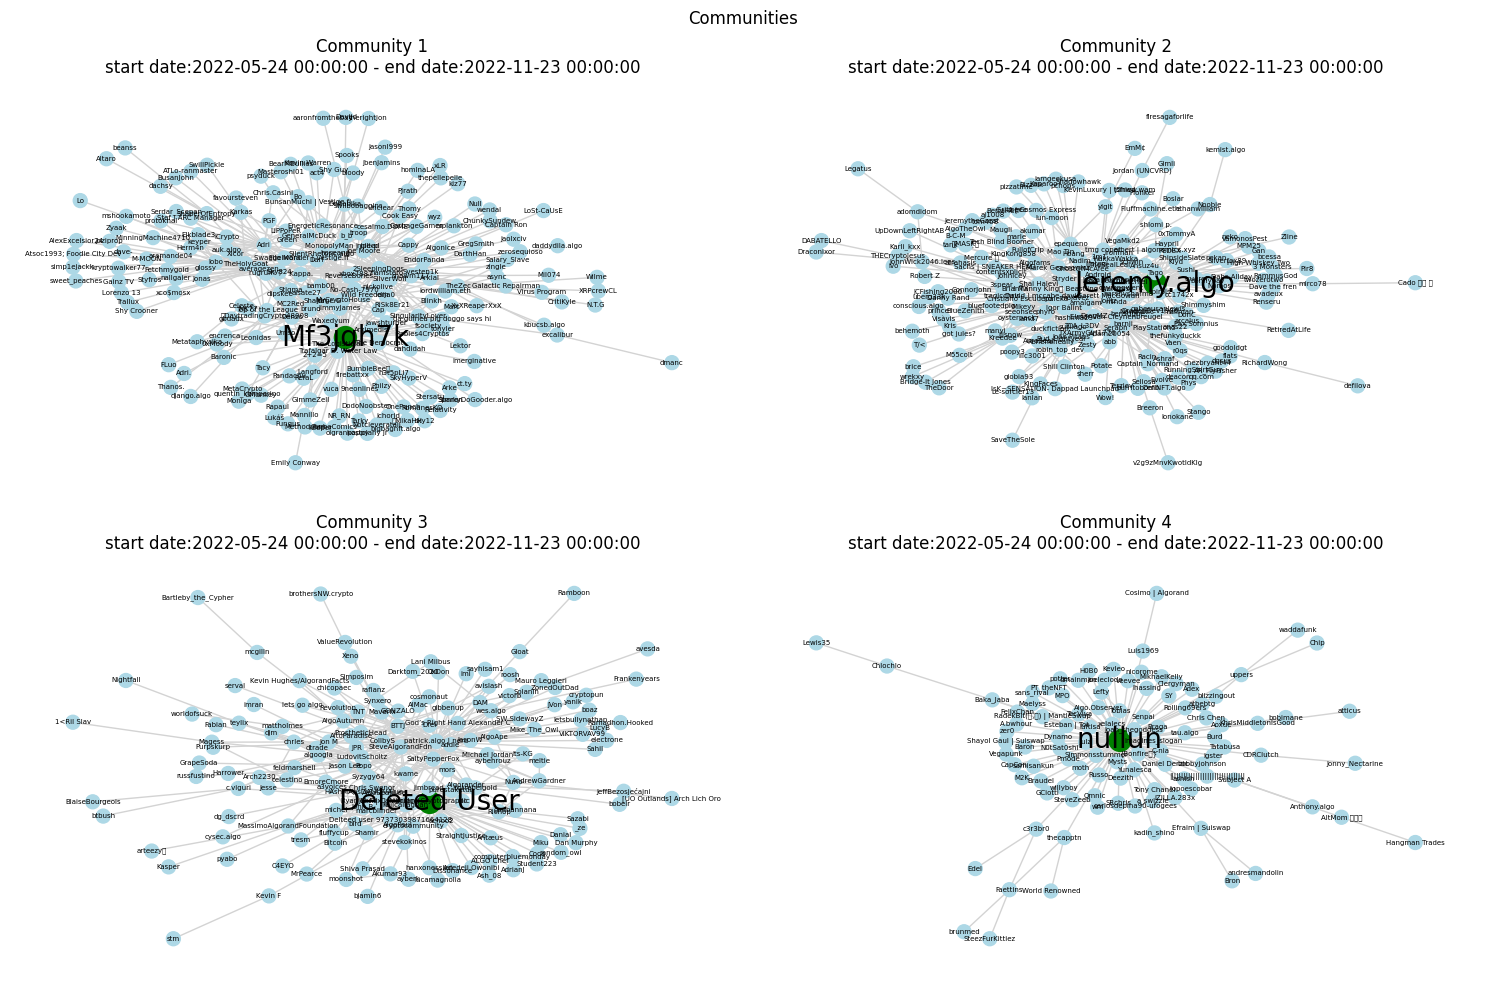


Numero totaledi nodi che cambiato comunità: 0

La chat ha 31 comunità.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128065 (\N{EYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128298 (\N{HOCHO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129332 (\N{PR

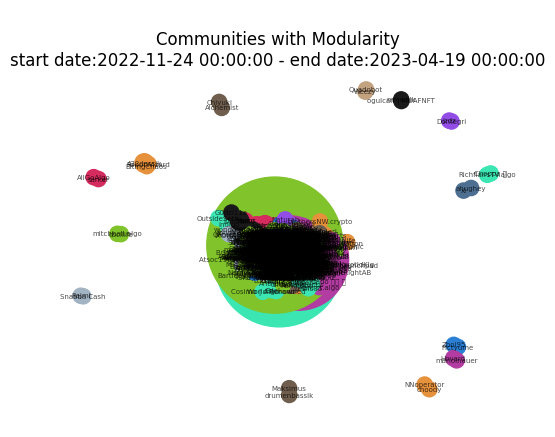

<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 128065 (\N{EYE}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 127943 (\N{HORSE RACING}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 129332 (\N{PRINCE}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 129782 (\U0001faf6) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 129689 (\N{COIN}) missing from current font.
  plt.tight_layout()
<ipython-input-33-4e9fea109e2e>:56: UserWarning: Glyph 128272 (\N{CLOSED LOCK WITH KEY}) missing from current font.
  plt.tight_layou

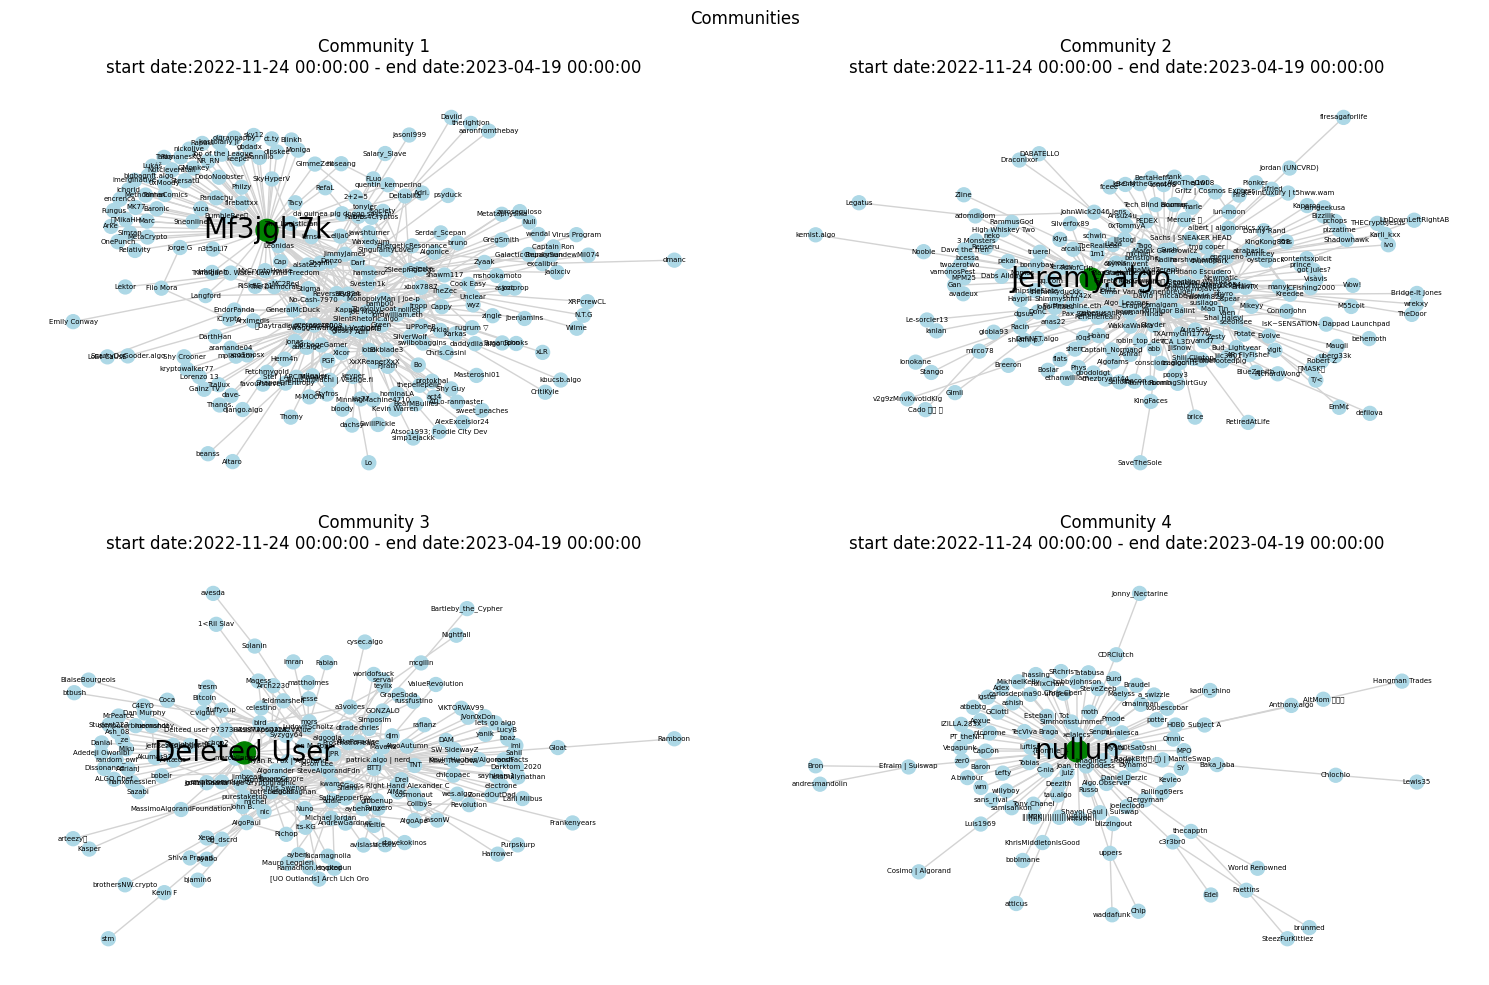


Numero totaledi nodi che cambiato comunità: 0



In [ ]:
menzioni['Time_stamp'] = pd.to_datetime(menzioni['Time_stamp'])
dates = [('2020-11-24', '2021-05-23'), ('2021-05-24', '2021-11-23'),
          ('2021-11-24', '2022-05-23'),
              ('2022-05-24', '2022-11-23'), ('2022-11-24', '2023-04-19')]

for start_date, end_date in dates:

    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    filtered_menzioni = menzioni[menzioni['Time_stamp'].between(start_date, end_date)]

    cluster = {}

    for autore in menzioni['Author_nickname']:
        if autore not in cluster.keys():
            cluster[autore] = []

    for _, row in menzioni.iterrows():
        if row['Author_nickname'] in cluster.keys():
            cluster[row['Author_nickname']].append(row['Mention_nickname'])

    G = nx.Graph()

    for node, mentions in cluster.items():
        for neighbor, weight in dict(pd.Series(mentions).value_counts()).items():
            G.add_edge(node, neighbor, weight=weight)

    communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

    print(f"La chat ha {len(communities)} comunità.")

    size_map = [60 + 60 * G.degree[node] for node in G.nodes]

    set_node_community(G, communities)
    set_edge_community(G)

    node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

    external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
    internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]

    internal_color = ['lightgray'] * len(internal)

    pos = nx.spring_layout(G)
    plt.suptitle(f"\nCommunities with Modularity\n"
                  f"start date:{start_date} - end date:{end_date}\n")

    nx.draw_networkx_labels(G, pos=pos, font_size=5, font_color='black', alpha=0.7)

    nx.draw_networkx(
        G,
        pos=pos,
        node_size=0,
        edgelist=external,
        edge_color="lightgray",
        with_labels=False)

    nx.draw_networkx(
        G,
        pos=pos,
        node_color=node_color,
        node_size=size_map,
        edgelist=internal,
        edge_color=internal_color,
        with_labels=False)

    plt.axis('off')
    plt.show()

    """Mostro le comunità più rilevanti"""
    plot_community_graphs(G, communities)

    cluster_node_counts = {cluster: len(nodes) for cluster, nodes in cluster.items()}

    #Calcola il numero di nodi che ha cambiato comunicatà nel tempo
    node_community_history = {}
    for community_id, community in enumerate(communities):
        for node in community:
            if node not in node_community_history:
                node_community_history[node] = []
            node_community_history[node].append((start_date, end_date, community_id + 1))

    switched_nodes = []
    for node, history in node_community_history.items():
        if len(set(c for _, _, c in history)) > 1:
            switched_nodes.append(node)
    print(f"\nNumero totale di nodi che ha cambiato comunità: {len(switched_nodes)}\n")

***Secondo quesito***: *Individuare i topic predominanti osservando se gli autori scrivono messaggi riguardanti le stesse tematiche*

In [ ]:
#Import delle librerie necessarie

import re
from collections import Counter
from datetime import datetime
from itertools import combinations

import nltk
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
import matplotlib.colors as mcolors

from wordcloud import WordCloud


In [ ]:
#Definizione della funzione per il preprocessing dei messaggi

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

messages = []
processed_messages = []

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text.lower())
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words and len(word) > 2]
    words = [lemmatizer.lemmatize(word) for word in words]
    return words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Caricamento data set e creazione dizionario contenente nome degli autori e messaggi scritti dagli stessi

def load_messages(start_date, end_date):
    author_messages = {}
    path = '/content/Algorand - Algorand - 🏛│governance [780538107879358494].json'

    with open(path, 'r') as file:
        data = json.load(file)
        messages = data['messages']

        for message in messages:
            timestamp = message['timestamp']
            timestamp = datetime.strptime(timestamp[:10], "%Y-%m-%d").date()

            if start_date <= timestamp <= end_date:
                if 'author' in message and 'name' in message['author']:
                    author = message['author']['name']

                    if author not in author_messages:
                        author_messages[author] = []

                    author_messages[author].append(message['content'])

    author_messages_filtered = {}

    for author, messages in author_messages.items():
        if len(messages) > 10:
            author_messages_filtered[author] = messages

    return author_messages_filtered


In [ ]:
#Definizione della funzione che crea il grafo in cui i nodi sono gli autori e gli archi i topic in comune

def create_network(time_coordinates=()):
    author_messages = load_messages(time_coordinates[0], time_coordinates[1])
    G = nx.Graph()
    dictionary = corpora.Dictionary()
    corpus = []
    processed_messages = []

    for author in author_messages.keys():
        for message in author_messages[author]:
            processed_messages.append(preprocess_text(message))

    total_mes = []
    for author in author_messages:
        mes = author_messages[author]
        total_mes.extend(mes)
    text_str = ' '.join(total_mes)
    wordcloud = WordCloud(collocations=False,
                          background_color='white',
                          width=1600,
                          height=800,
                          margin=2,
                          min_font_size=20).generate(text_str)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.figtext(.5, .8, '',
                fontsize=40,
                ha='center',
                color='blueviolet',
                fontproperties='cursive')

    plt.show()

    dictionary.add_documents(processed_messages)
    corpus.extend([dictionary.doc2bow(message) for message in processed_messages])

    num_topics = 20
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
    keywords_dict = {}

    for topic_id in range(num_topics):
        keywords = lda_model.get_topic_terms(topic_id,topn=10)
        keywords = [dictionary.id2token[word_id] for word_id, _ in keywords]
        keywords_dict[topic_id] = keywords

    main_topics_dict = {}
    for author in author_messages.keys():
        G.add_node(author)

        messages_auth = [ preprocess_text(messaggio) for messaggio in author_messages[author] ]
        bows = [ dictionary.doc2bow(mes) for mes in messages_auth ]
        topic_counter = Counter()
        for bow in bows:
            topics_message = lda_model.get_document_topics(bow)
            ordered_topics = sorted(topics_message, key=lambda x: x[1], reverse=True)
            main_topic = ordered_topics[0][0]
            topic_counter[main_topic] += 1
        top_main_topics = topic_counter.most_common(3)
        main_topics_dict[author] = top_main_topics

    for pair in combinations(author_messages.keys(), 2):
        autore1 = pair[0]
        autore2 = pair[1]
        main_topics1 = set([topic for topic, n_times in main_topics_dict[autore1]])
        main_topics2 = set([topic for topic, n_times in main_topics_dict[autore2]])
        common_topics = main_topics1.intersection(main_topics2)
        peso_collegamento = len(common_topics)
        if peso_collegamento > 0:
            G.add_edge(autore1, autore2, weight=peso_collegamento)

    num_nodes = G.number_of_nodes()
    print(f"Number of nodes in the graph for {dates[0]} to {dates[1]}: {num_nodes}")
    colors = list(mcolors.CSS4_COLORS.values())
    topic_colors = colors[:num_topics]
    degrees = G.degree()
    dict_degrees = dict(degrees)
    node_size = []
    for node in G.nodes:
        if node in dict_degrees.keys():
            grado = dict_degrees[node]
            if grado > 30:
                node_size.append(1000)
            elif grado > 25:
                node_size.append(750)
            elif grado > 20:
                node_size.append(500)
            elif grado > 15:
                node_size.append(250)
            elif grado > 10:
                node_size.append(100)
            else:
                node_size.append(50)

    for author, topics in main_topics_dict.items():
        main_topic = topics[0][0]
        color = topic_colors[main_topic % len(topic_colors)]
        G.nodes[author]['color'] = color
    colors = [G.nodes[node]['color'] for node in G.nodes()]

    plt.figure(figsize=(10, 6))
    pos = nx.kamada_kawai_layout(G)

    nx.draw(G, pos, edge_color='lightgray', with_labels=True, node_size=node_size, alpha=0.7, font_size=7, node_color=colors)
    '''Transitivity, eigenvectorcentrlaty, density'''
    trans = nx.transitivity(G)
    print(f'La transitivity è: {trans}')
    dens = nx.density(G)
    print(f'La transitivity è: {dens}')
    EC = nx.eigenvector_centrality(G)
    media_tot = 0
    for author in EC:
        media_EC = EC[author]/len(EC)
        print(author,':', EC[author])
        media_tot +=media_EC
    print(f'La eigenvector centrality media è pari a:{media_tot}')

    degrees = G.degree()
    dict_degrees = dict(degrees)
    degree_medio = 0
    for author in dict_degrees:
        degree = dict_degrees[author]/len(degrees)
        #print(author,':', dict_degrees[author])
        degree_medio +=degree
    print(f'Il degree medio è pari a:{degree_medio}')


In [ ]:
#Divisione in semestri e visualizzazione dei grafi

timestamps = [("2020-11-24", "2023-04-20"),
              ("2020-11-24", "2021-05-23"),
              ("2021-05-24", "2021-11-23"),
              ("2021-11-24", "2022-05-23"),
              ("2022-05-24", "2022-11-23"),
              ("2022-11-24", "2023-04-20")]
converted_timestamps = []
for start_date, end_date in timestamps:
    start_date = datetime.strptime(start_date, "%Y-%m-%d").date()
    end_date = datetime.strptime(end_date, "%Y-%m-%d").date()
    converted_timestamps.append((start_date, end_date))
for dates in converted_timestamps:
    print('Start creating network...')
    create_network(dates)
    plt.title("Authors Network based on Topic Similarity")
    plt.show()


Start creating network...


FileNotFoundError: ignored

***Terzo quesito***: *Analizzare le similarità tra topic discussi all’interno del canale evidenziando le keywords in comune, realizzando un grafo i cui nodi sono i topic e gli edges le keywords*.

In [ ]:
#Caricamento del dataset

def load_messages(start_date, end_date):
    path = '/content/Algorand - Algorand - 🏛│governance [780538107879358494].json'

    with open(path, 'r') as file:
        data = json.load(file)
        messages = data['messages']

        filtered_messages = []
        for message in messages:
            timestamp = message['timestamp']
            timestamp = datetime.strptime(timestamp[:10], "%Y-%m-%d").date()

            if start_date <= timestamp <= end_date:
                if 'content' in message:
                    filtered_messages.append(message['content'])

    return filtered_messages

In [ ]:
#Definizione della fuzione per creare il grafo in cui i topic sono i nodi e gli archi vengono creati se all'interno di due topic ci sono keywords in comune

def create_network(start_date, end_date):
    messages = load_messages(start_date, end_date)
    processed_messages = [preprocess_text(message) for message in messages]

    dictionary = corpora.Dictionary(processed_messages)
    corpus = [dictionary.doc2bow(message) for message in processed_messages]

    num_topics = 20
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary)

    topic_keywords = {}
    for topic_id in range(num_topics):
        keywords = [dictionary.id2token[word_id] for word_id, _ in lda_model.get_topic_terms(topic_id, topn=10)]
        topic_keywords[topic_id] = keywords
    print(topic_keywords)

    G = nx.Graph()
    for topic_id in range(num_topics):
        G.add_node(topic_id)

    topic_interactions = {}
    for topic_pair in combinations(range(num_topics), 2):
        topic1, topic2 = topic_pair
        common_keywords = set(topic_keywords[topic1]).intersection(set(topic_keywords[topic2]))
        if common_keywords:
            weight = len(common_keywords)
            topic_interactions[topic_pair] = weight

    for topic_pair, weight in topic_interactions.items():
        topic1, topic2 = topic_pair
        if weight > 3:
            edge_color='red'
        elif weight == 3:
            edge_color='yellow'
        elif weight ==2:
            edge_color='green'
        else:
            edge_color='lightgray'
        G.add_edge(topic1, topic2, weight=weight, color=edge_color)

    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=300)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

    edge_colors = [d['color'] for _, _, d in G.edges(data=True)]
    edge_widths = [d['weight'] for _, _, d in G.edges(data=True)]
    max_weight = max(edge_widths)
    normalized_widths = [width / max_weight * 3 for width in edge_widths]

    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=normalized_widths)
    nx.density(G)
    print(f'La denistà è pari a {nx.density(G)}')
    plt.title("Topics Network based on Common Keywords")
    plt.show()


Creating network: 2020-11-24 - 2023-04-20


{0: ['like', 'see', 'even', 'asset', 'would', 'think', 'voting', 'commited', 'seems', 'good'], 1: ['algorand', 'governance', 'http', 'foundation', 'com', 'www', 'community', 'news', 'voting', 'proposal'], 2: ['discord', 'people', 'algo', 'want', 'hard', 'fee', 'market', 'channel', 'move', 'least'], 3: ['wallet', 'ledger', 'transaction', 'anyone', 'need', 'governance', 'vote', 'connect', 'use', 'algo'], 4: ['governance', 'voting', 'contract', 'power', 'smart', 'option', 'commit', 'period', 'dao', 'always'], 5: ['thanks', 'apy', '100', 'link', 'farm', 'count', 'really', 'wallet', 'community', 'hope'], 6: ['defi', 'pera', 'folk', 'governance', 'community', 'algorand', 'would', 'need', 'know', 'foundation'], 7: ['reward', 'token', 'incentive', 'node', 'trying', 'governance', 'staking', 'algoexplorer', 'staked', 'get'], 8: ['pool', 'mean', 'reward', 'governance', 'get', 'algo', 'went', 'project', 'liquid', 'great'], 9: ['algos', 'would', 'people', 'platform', 'per', 'short', 'algo', 'nice',

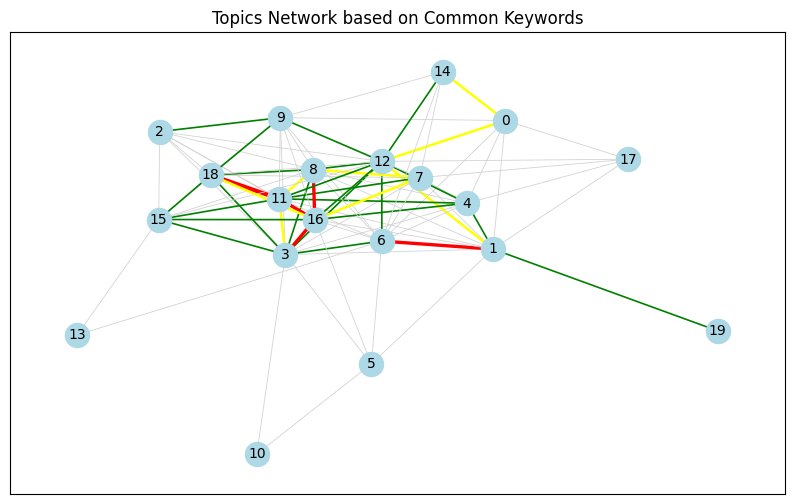

In [ ]:
#Visualizzazione del grafo

dates = [datetime(2020, 11, 24).date(), datetime(2023, 4, 20).date()]
print(f"Creating network: {dates[0]} - {dates[1]}")
create_network(dates[0], dates[1])

***Quarto quesito***: *Confrontare le attività sul canale con l’andamento azionario della criptovaluta, nell’arco temporale, valutando se le due forze si influenzano a vicenda o meno*.

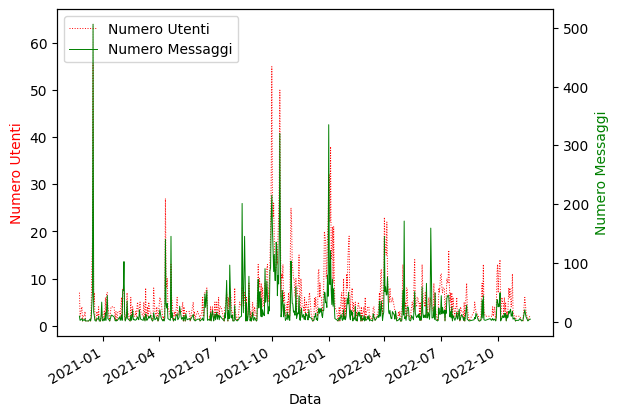

In [ ]:
messaggi['Time_stamp'] = pd.to_datetime(messaggi['Time_stamp'])
dates = ['2020-11-24', '2021-05-24', '2021-11-24', '2022-05-24', '2022-11-24']

all_dates = []
unique_author_counts = []
message_counts = []

for i in range(len(dates) - 1):
    start_date = pd.to_datetime(dates[i])
    end_date = pd.to_datetime(dates[i + 1]) - pd.DateOffset(days=1)

    filtered_messaggi = messaggi[messaggi['Time_stamp'].between(start_date, end_date)]

    unique_authors_per_day = filtered_messaggi.groupby(filtered_messaggi['Time_stamp'].dt.date)['Author_id'].nunique()

    messages_per_day = filtered_messaggi.groupby(filtered_messaggi['Time_stamp'].dt.date).size()

    all_dates.extend(unique_authors_per_day.index)
    unique_author_counts.extend(unique_authors_per_day.values)
    message_counts.extend(messages_per_day.values)

dates = pd.to_datetime(dates)

#STAMPO LE SERIE TEMPORALI

fig, ax1 = plt.subplots()
ax1.plot(all_dates, unique_author_counts, linestyle='dotted', color='red', label='Numero Utenti', linewidth=0.7)
ax1.set_xlabel('Data')
ax1.set_ylabel('Numero Utenti', color='red')

ax2 = ax1.twinx()
ax2.plot(all_dates, message_counts, linestyle='solid', color='green', label='Numero Messaggi', linewidth=0.7)
ax2.set_ylabel('Numero Messaggi', color='green')

lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
ax1.legend(lines, [line.get_label() for line in lines], loc='upper left')
plt.gcf().autofmt_xdate()
plt.show()

Andamento del prezzo di ALGO (token Algorand) dal 15/09/2021 al 31/10/2021

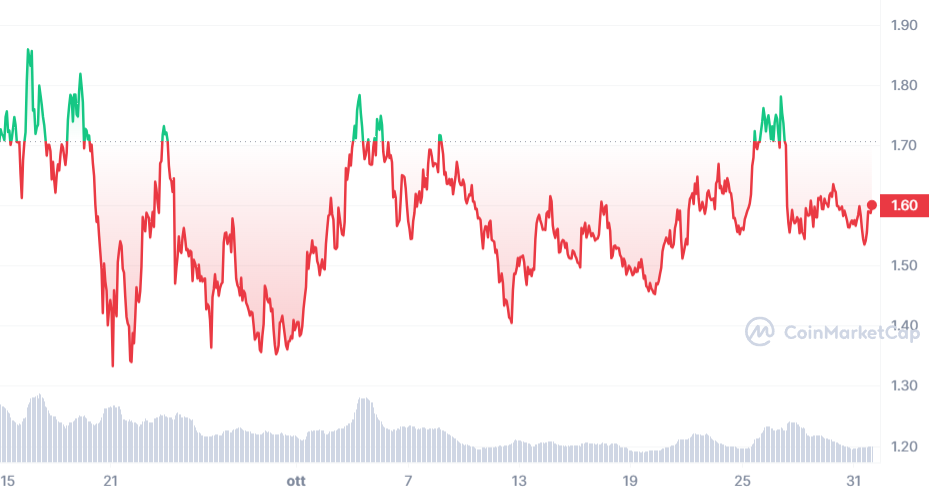